<a href="https://colab.research.google.com/github/BrunoAzambuja/Deteccao_de_fake_news_com_redes_neurais/blob/main/Detec%C3%A7%C3%A3o_de_fake_news_com_redes_neurais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Detecção de fake news com redes neurais
#### Redes neurais como modelo classificador de fake news, uma aplicação da biblioteca TensorFlow.

*by [Bruno Azambuja](https://www.brunoazambuja.com/m)*


<p align=center>  <img src="https://image.freepik.com/free-photo/woman-reading-newspaper_53876-13446.jpg" width="50%"></p>

Vivemos na era digital, onde a informação está mais acessível do que nunca, e continua ficando cada vez mais acessível, de forma mais ágil e ampla.

Apesar dos benefícios que isso traz, também existem problemas e riscos com isso. Aqui, vamos nos preocupar com um dos maiores deles: ***Fake News***. Com certeza você já se deparou com uma dessas. Em uma era de informação, a desinformação acaba sendo o nosso maior problema.

Em suma, ***Fake News*** são, como a tradução literal sugere, Notícias Falsas. Elas podem ir desde um número diferente em uma estatística apresentada, até a notícia de uma acontecimento completamente falso.

***Como isso influencia a nossa vida?***

Como de costume, nós tendemos a acreditar nos grandes veículos de mídia, ou de pessoas do nosso ciclo de amigos que nos encaminham notícias em redes sociais. Dessa forma, criamos o hábito de não checar nossas fontes, e assim, acreditamos e disseminamos notícias falsas, às vezes sem nem saber.

Isso se torna um grande problema quando afeta o resultado de algo importante no bem comum de nossa sociedade, como resultados de eleições, opinião pública sobre determinados projetos, políticas públicas, e até pessoas públicas, sejam elas do meio político, artístico, jornalístico, ou qualquer outro.



# Entendendo os objetivos

Hoje em dia, podemos contar com ferramentas que nos ajudem a identificar e filtrar notícias falsas. Com técnicas de **Redes Neurais** essa tarefa de vasculhar diversas fontes de notícias para descobrir o que é falso e o que é factual fica mais fácil.

> O objetivo deste projeto é treinar um modelo que seja capaz de classificar notícias, com a melhor acurácia possível, entre falsas ou factuais.

Para isso, usaremos a biblioteca ***Tensorflow*** para treinar Redes Neurais que façam esse trabalho por nós.

# Instalando as bibliotecas

Primeiramente vamos instalar as bibliotecas e importar todos os pacotes necessários para este estudo.

In [ ]:
# instalando pacotes
%pip install wordcloud -q
%pip install pywaffle -q

In [ ]:
# importando os pacotes necessarios
%tensorflow_version 2.x
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import joblib

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from pywaffle import Waffle

from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Flatten, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional
from keras.preprocessing import text,sequence
from keras.models import Sequential
# from keras.layers import Dense,Embedding,LSTM,Dropout

# configurando o noteebook
np.random.seed(42)
sns.set_style()

# gerando filtro de mensagens de warning
import warnings
warnings.filterwarnings('ignore')

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


# Importando os dados

Os dados utilizados neste projeto foram originalmente disponibilizados na página do [Kaggle](https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset), nela se tem acesso aos dados fonte do estudo. Primeiro, vamos importar os dados dos produtos para entender melhor o que temos em nossas mãos. Estes dados estão divididos em 2 *dataframes*: um de notícias factuais e outro de falsas:

In [ ]:
# importando os dados para um dataframe
true = ('/content/True.csv')
df_true = pd.read_csv(true)

# visualizando as entradas
df_true

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [ ]:
# importando os dados para um dataframe
fake = ('/content/Fake.csv')
df_fake = pd.read_csv(fake)

# visualizando as entradas
df_fake

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


Os nossos dados possuem *features* que correspondem às seguintes informações:

* `title`: título da notícia;
* `text`: texto da notícia;
* `subject`: assunto da notícia;
* `date`: data em que foi publicada.


Com os dados importados para dentro das estruturas *dataframes*, pode-se iniciar a preparação dos dados, para que na sequência possamos buscar *insights* propostos pelo EDA e para que os dados também estejam em condições adequadas para o desenvolvimento do modelo.

# Preparando os dados

Esta etapa consiste em preparar nosso conjunto de dados, nela executaremos as seguintes etapas de tratamento dos dados:

* *Feature Engineering*:
  * Gerar novas *features*;
  * Contatenar *dataframes* para gerar novo. 
* Limpeza dos dados:
  * Eliminar valores duplicados;
  * Verificar valores faltantes;
  * Tratar ou remover dados discrepantes.
* *Spliting data*:
  * Dividir o conjunto de dados entre dados de treinamento, validação e teste.

###**Feature Engineering**

As técnicas de *feature engineering* é um tópico fundamental em ciências de dados, é o termo utilizado para definir um conjunto de técnicas utilizado na criação e manipulação de features (recursos). Porém, *feature engineering* não se trata apenas de selecionar bons recursos para um modelo. Esse processo também abrange a transformação matemática nas features existentes para extrair o máximo potencial dos dados e criação de novas features.

**Agregando novas features**

Para o preparação dos dados primeiramente vamos gerar a *feature target* em cada *dataframe* indicando as seguintes informações:

* `Target`: que é nossa variável alvo e será dividida em:
  * True (Factual) = 0
  * Fake (Falsa) = 1

In [ ]:
# gerando uma nova feature nos dataframes
df_true['target'] = 1
df_fake['target'] = 0

**Concatenando dataframes**

Com a nova a *feature target* gerada, vamos concatenar os dois *dataframes* já importados em um novo. Este novo *dataframe* receberá todo o tratamento necessário para que possamos alcançar os objetivos propostos neste estudo:

In [ ]:
# gerando novo dataframe
df_clean = pd.concat([df_true,df_fake])
df_clean

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


Como podemos ver, chegamos à um único e novo *dataframe* com 44.898 entradas e 5 colunas, contempando tanto notícias fake como true.

###**Limpeza dos dados**

Nesta etapa serão realizadas algumas verificações para identificar possíveis dados discrepantes e para que assim possamos ajustá-los.

**Valores duplicados**

Esta é uma etapa importante à ser verificada para que possamos reduzir os ruídos neste tipo de trabalho.

In [ ]:
# verificando a existência de dados duplicados
duplicated = df_clean[df_clean.duplicated().values]
duplicated

,title,text,subject,date,target
445,Senate tax bill stalls on deficit-focused 'tri...,WASHINGTON (Reuters) - The U.S. Senate on Thur...,politicsNews,"November 30, 2017",1
778,Trump warns 'rogue regime' North Korea of grav...,BEIJING (Reuters) - U.S. President Donald Trum...,politicsNews,"November 8, 2017",1
892,"Republicans unveil tax cut bill, but the hard ...",WASHINGTON (Reuters) - U.S. House of Represent...,politicsNews,"November 2, 2017",1
896,Trump taps Fed centrist Powell to lead U.S. ce...,WASHINGTON (Reuters) - President Donald Trump ...,politicsNews,"November 2, 2017",1
974,"Two ex-Trump aides charged in Russia probe, th...",WASHINGTON (Reuters) - Federal investigators p...,politicsNews,"October 30, 2017",1
...,...,...,...,...,...
21353,Thailand's ousted PM Yingluck has fled abroad:...,BANGKOK (Reuters) - Ousted Thai prime minister...,worldnews,"August 25, 2017",1
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
9942,HILLARY TWEETS MESSAGE In Defense Of DACA…OOPS...,No time to waste we've got to fight with eve...,politics,"Sep 9, 2017",0
11446,FORMER DEMOCRAT WARNS Young Americans: “Rioter...,"Who is silencing political speech, physically...",politics,"Mar 10, 2017",0


Como podemos observar o *dataframe* apresentou dados duplicados, desta forma vamos aplicar a seguinte limpeza dos dados:

In [ ]:
# removendo os dados duplicados
df_clean.drop(duplicated.index, axis = 0,inplace = True)

**Valores ausentes**

Na função abaixo, conseguimos verificar que não há valores ausentes neste *dataframe*.

In [ ]:
# checando os valores ausentes
(df_clean.isnull().sum() / df_clean.shape[0]).sort_values(ascending=False)

title      0.0
text       0.0
subject    0.0
date       0.0
target     0.0
dtype: float64

**Tratando os dados**

Aqui, estamos lidando com nossa linguagem natural em formato de `string`, então precisamos de alguns conhecimentos de NLP para tratar esses dados da melhor forma, para que possam ser passados ao nosso modelo com sucesso, e dessa forma, obtermos os resultados que desejamos.

In [ ]:
# tratando do texto das notícias
import string
def clean_text(text):
    words = str(text).split()
    words = [i.lower() + " " for i in words]
    words = " ".join(words)
    words = words.translate(words.maketrans('', '', string.punctuation))
    return words

df_clean['text'] = df_clean['text'].apply(clean_text)

In [ ]:
# verificando os dados tratados
df_clean

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",washington reuters the head of a conse...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,washington reuters transgender people wi...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,washington reuters the special counsel ...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,washington reuters trump campaign advise...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,seattlewashington reuters president donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st century wire says as 21wire reporte...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st century wire says it s a familiar ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,patrick henningsen 21st century wirerememb...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st century wire says al jazeera americ...,Middle-east,"January 14, 2016",0


###**Spliting data**

Agora, o que precisamos é separar nossos dados em treino e teste, para que possamos continuar a trilhar o caminho que nos leva ao modelo.

In [ ]:
# dividindo os dados entre treino e teste.
X_train, X_test, y_train, y_test = train_test_split(df_clean['text'], df_clean['target'], random_state=0)

In [ ]:
# verificando o formato dos conjuntos
print("Formato dataset orginal", df_clean.shape)
print("Formato dataset do X_train", X_train.shape)
print("Formato dataset do X_test", X_test.shape)

Formato dataset orginal (44480, 5)
Formato dataset do X_train (33360,)
Formato dataset do X_test (11120,)


# Exploratory Data Analysis (EDA)

Esta etapa foi dividida entre tópicos que visam tirar insights e elevar a consciência situacional a respeito do *dataframe*. Desta forma, a análise exploratória tem por objetivo permitir um entendimento de como os dados estão estruturados.

Este é um processo crítico que visa realizar investigações iniciais nos dados para descobrir padrões, detectar anomalias, testar hipóteses e verificar suposições com a ajuda de estatísticas resumidas e representações gráficas.

###**Balanceamento**

Por fim, nesta análise exploratória, vamos ver o balanceamento das classes do *dataframe*. Para identificar se os nossos dados podem estar com algum tipo de bias (viés) e tirar alguns insights do negócio.

**Balanceamento da variável alvo**

Abaixo podemos verificar o balanceamento dos dados com relação à *feature* `target`. Estes dados nos mostram a frequência em que ocorre casos onde a situação de fake news é positiva ou negativa dentre as notícias listadas em nosso *dataframe*:

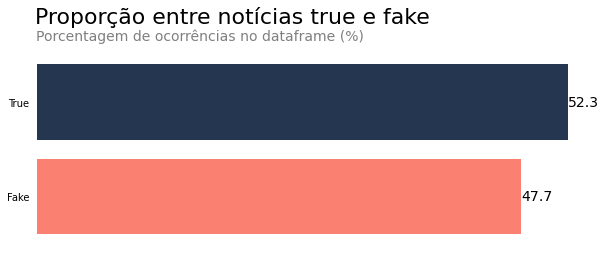

In [ ]:
# agrupando porcentagem de cada tipo de imóveis e classificando
y = df_clean.replace({'target': {0: 'True', 1: 'Fake'}})
y = (y['target'].value_counts().sort_values()/ df_clean.shape[0]*100)

# arredondando valores
y = round(y, 1)

# gerando os elementos do gráfico de barras
fig, ax = plt.subplots(figsize=(10,4))
y.plot(kind="barh", ax=ax, color=["salmon","#253750"], width=0.8)
plt.title("Proporção entre notícias true e fake", fontsize=22, x=0.35, y=1.05)
plt.suptitle("Porcentagem de ocorrências no dataframe (%)", color = "gray", fontsize= 14, x=0.3515, y=0.92)

# adicionando valores nas barras
for index, value in enumerate(y): 
    plt.text(value, index, str(value), color="black", verticalalignment="center", fontsize=14) 

# removendo visibilidade do fundo
for item in [fig, ax]:
    item.patch.set_visible(False)

# definindo visibilidade de parâmetros
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False) 
plt.tick_params(axis='y', which='both', right=False, left=False, labelleft=True) 
for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False)


É possível identificar que ambas as classes ocorrem com frequência similares, o que nos vela à entender que há um balanceamento dos dados com relação à variável alvo.

**Balanceamento da variável assunto**

Abaixo podemos verificar o balanceamento dos dados com relação à *feature* `subject`. Estes dados nos mostram a frequência em que ocorre as notícias em relação às cada grupo de asssunto dentre o nosso conjunto de notícias listados neste *dataframe*:


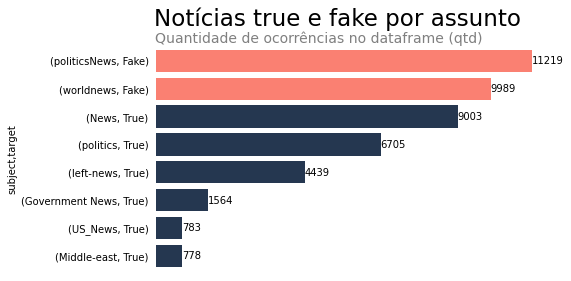

In [ ]:
# agrupando porcentagem de cada tipo de imóveis e classificando
y = df_clean.replace({'target': {0: 'True', 1: 'Fake'}})
y = (y.groupby(["subject"])["target"].value_counts()).sort_values()

# arredondando valores
y = round(y, 0)

# gerando os elementos do gráfico de barras
fig, ax = plt.subplots(figsize=(8,4))
y.plot(kind="barh", ax=ax, color=["#253750","#253750","#253750","#253750","#253750","#253750","salmon","salmon"], width=0.8)
plt.title("Notícias true e fake por assunto", fontsize=23, x=0.459, y=1.05)
plt.suptitle("Quantidade de ocorrências no dataframe (qtd)", color = "gray", fontsize= 14, x=0.56, y=0.88)

# adicionando valores nas barras
for index, value in enumerate(y): 
    plt.text(value, index, str(value), color="black", verticalalignment="center", fontsize=10) 

# removendo visibilidade do fundo
for item in [fig, ax]:
    item.patch.set_visible(False)

# definindo visibilidade de parâmetros
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False) 
plt.tick_params(axis='y', which='both', right=False, left=False, labelleft=True) 
for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False)

# plotado o gráfico
fig.tight_layout()
plt.show()

Como podemos observar, todas as notícias dos assuntos `politcsNews`e `worldnews` são do tipo fake, enquanto os demais assuntos apresentam em suas totalidades notícias do tipo verdadeira.

Agora vamos avaliar a linha do tempo em relação às notícias true e fake encontradas no *dataframe*.

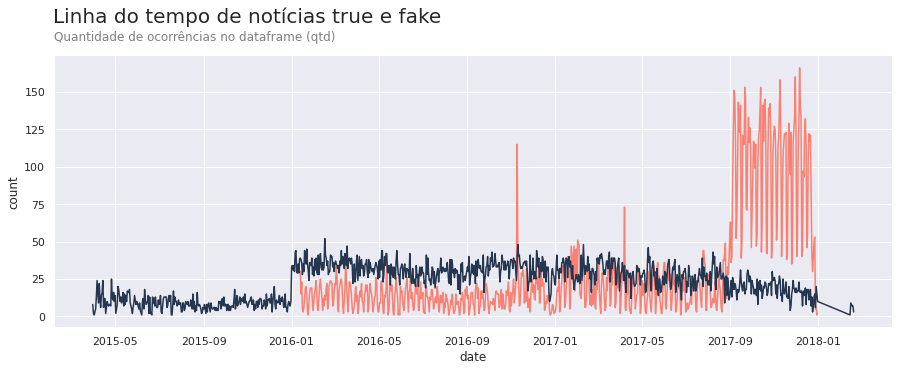

In [ ]:
# removendo outros textos na coluna data
date_pattern = "Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec"
filter2 = df_clean['date'].str.contains(date_pattern)
df_clean = df_clean[filter2]
df_clean.reset_index(drop=True, inplace=True)

# convertendo formato do date string para datetime
df_clean = df_clean.copy()
df_clean['date'] = pd.to_datetime(df_clean['date'])
df_clean.sort_values(by=['date'], inplace=True)
df_clean.reset_index(drop=True, inplace=True)
pd.reset_option('max_rows')

# criando dataframe de notícias fake por data
fake = df_clean[df_clean['target']==1]
fake['count'] = 0
fake = fake.groupby(['date'])['count'].count()
fake = pd.DataFrame(fake)

# criando dataframe de notícias true por data
true = df_clean[df_clean['target']==0]
true['count'] = 0
true = true.groupby(['date'])['count'].count()
true = pd.DataFrame(true)

# gerando gráfico da linha do tempo de notícias true e fake
sns.set(rc={'figure.figsize':(15,5)}, palette=['salmon', '#253750'])
sns.lineplot(x=fake.index, y=fake['count'])
sns.lineplot(x=true.index, y=true['count'])

# adicionando títulos
plt.title("Linha do tempo de notícias true e fake", fontsize=20, x=0.23, y=1.1)
plt.suptitle("Quantidade de ocorrências no dataframe (qtd)", color = "gray", fontsize= 12, x=0.255, y=0.95)
  
# definindo visibilidade de parâmetros
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True) 
plt.tick_params(axis='y', which='both', right=False, left=False, labelleft=True) 
for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False);

Acima podemo observar um aumento significativo de notícias fake entre setembro de 2017 e janeiro de 2018, superando o número total de notícias da categoria true.

###**Worldcloud**

Wordcloud (em português, nuvem de palavras ou nuvem de tags) é um tipo de visualização de dados muito poderoso, principalmente quando estamos trabalhando com textos, documentos, pesquisas, entre outros.

As palavras maiores são as que apareceram mais no texto, e as menores são as que menos apareceram. Além de ser extremamente útil para análises, é visualmente impactante, agregando valor a qualquer relatório ou notebook.

Basicamente, foram extraídas as descrições de todos os textos das notícias, com a finalidade de descobrir quais os termos e palavras mais usados tanto de notícias verdadeiras como fake.

In [ ]:
# Total number of words in dataset
list_words = []
for i in df_clean.text:
    for j in i:
        list_words.append(j)
print ('Total number of words are: {}'.format(len(list_words)))

Total number of words are: 124978946


In [ ]:
#total unique words
total_unique_words = len(list(set(list_words)))
total_unique_words

72

**Wordclud dos títulos das notícias verdadeiras**

In [ ]:
# separando a coluna
name = df_clean.title[df_clean.target == 0]

# concatenando as palavras
all_name = " ".join(s for s in name)

# vendo a quantidade de palavras
print("Quantidade total de palavras dos títulos com notícias verdadeiras: {}".format(len(all_name)))

Quantidade total de palavras dos títulos com notícias verdadeiras: 2213056


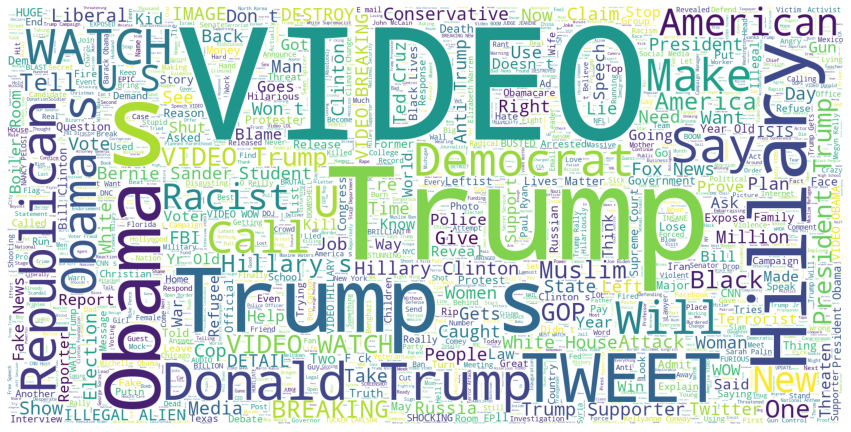

In [ ]:
# gerando a wordcloud
wordcloud = WordCloud(background_color="white", width=1600, height=800, max_words=2000, max_font_size=300, min_font_size=1).generate(all_name)

# mostrando a imagem final
fig, ax = plt.subplots(figsize=(15,25))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(wordcloud);

**Wordclud dos títulos de notícias fake**

In [ ]:
# separando a coluna
name = df_clean.title[df_clean.target == 1]

# concatenando as palavras
all_name = " ".join(s for s in name)

# vendo a quantidade de palavras
print("Quantidade total de palavras dos títulos com notícias fake: {}".format(len(all_name)))

Quantidade total de palavras dos títulos com notícias fake: 1392502


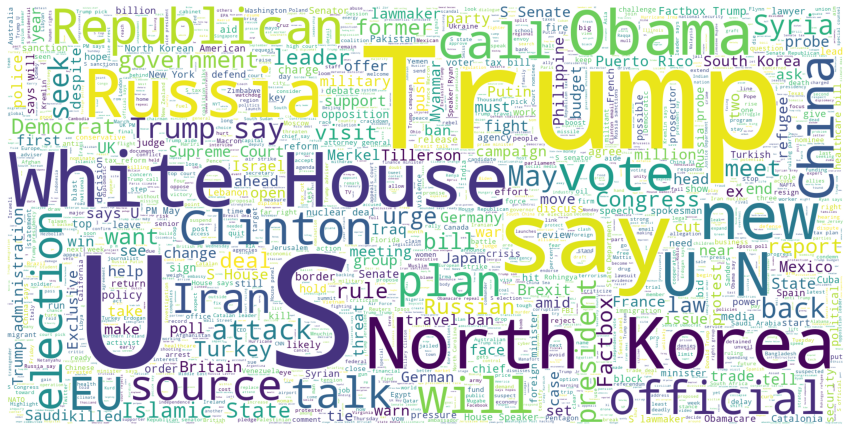

In [ ]:
# gerando a wordcloud
wordcloud = WordCloud(background_color="white", width=1600, height=800, max_words=2000, max_font_size=300, min_font_size=1).generate(all_name)

# mostrando a imagem final
fig, ax = plt.subplots(figsize=(15,25))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(wordcloud);

###**Distribuições**

Agora vamos ver a distribuição de quantidade média de palavras entre as notpicias verdadeiras e fake. Para identificar se os nossos dados podem estar com algum tipo de bias (viés) e tirar alguns *insights*.


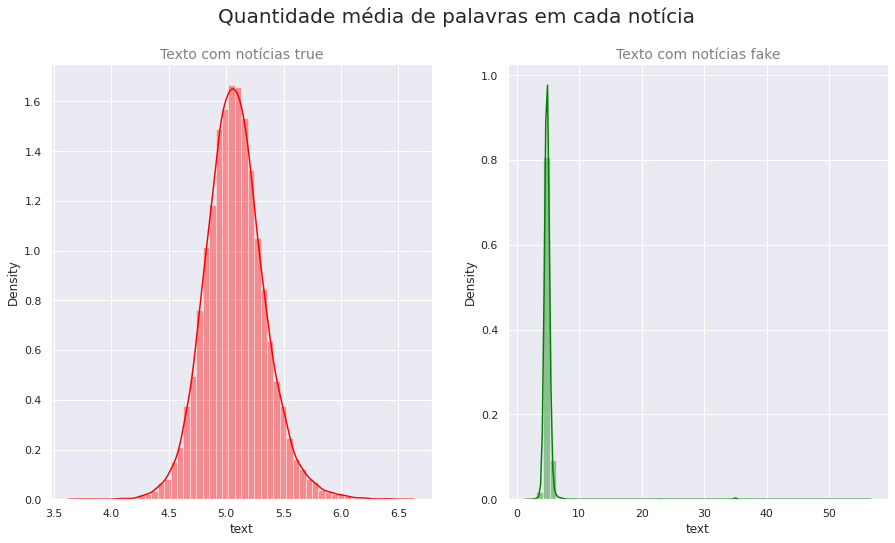

In [ ]:
# gerando o gráfico
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,8))
word=df_clean[df_clean['target']==1]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='red')
ax1.set_title('Texto com notícias true', color = "gray", fontsize= 14)
word=df_clean[df_clean['target']==0]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='green')
ax2.set_title('Texto com notícias fake', color = "gray", fontsize= 14)
fig.suptitle('Quantidade média de palavras em cada notícia', fontsize= 20);

Podemos observar que em alguns casos o número médio de palavras de notícias fake apresentaram um número elevado, se compararamos às notícias verdadeiras. Indicando a presença de outliers com elevado número de palavras em notícias fake.

# Modelo de Rede Neural

Aqui nesta parte usamos **Rede Neurais** para prever se a notícia dada é falsa ou não. Não vamos usar redes neurais normais como ANN para classificar, mas LSTM, que ajuda a conter informações de sequência.

***Long Short-Term Memory (LSTM)*** é um tipo de rede neural recorrente capaz de aprender a dependência de ordem em problemas de previsão de sequência. Esse é um comportamento necessário em domínios de problemas complexos, como tradução automática, reconhecimento de fala e muito mais.

Para darmos uma pequena visão geral do funcionamento do LSTM, podemos dizer que ele lembra apenas a sequência importante de palavras e esquece as palavras insignificantes que não agregam valor na previsão. Para entender um pouco mais como o ***LSTM*** funciona, verifique este [link](https://colah.github.io/posts/2015-08-Understanding-LSTMs/). 

<p align=center>  <img src="https://i.stack.imgur.com/02KvP.png" width="40%"></p>

<p align=center>  <img src="https://i.stack.imgur.com/jyoNj.png" width="40%"></p>

###**Tokenizing**

Aqui neste projeto estamos focando em ***Deep Learning*** e a implementação de **Redes Neurais**, por isso, não iremos nos extender em pré-processamento de Strings.

De qualquer forma, esse é um ponto importante do projeto. Aqui, basicamente o que queremos é simplificar o texto, para que seja mais fácil do nosso modelo processar e entender. Por isso, iremos utilizar uma técnica que se chama ***Tokenizing***.

Em suma, Tokenizing, ou Tokenização, em tradução livre, é um passo que separa longos textos de strings em pedaços de textos mais curtos, chamados de tokens.

<p align=center>  <img src="https://www.kdnuggets.com/wp-content/uploads/text-tokens-tokenization-manning.jpg" width="50%"></p>

In [ ]:
# definindo hiperparâmetros de tokenização
max_features = 10000
maxlen = 300

In [ ]:
# tokenizando os dados de treino e teste
tokenizer = text.Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(X_train)

tokenized_train = tokenizer.texts_to_sequences(X_train)
tokenized_test = tokenizer.texts_to_sequences(X_test)

X_train = pad_sequences(tokenized_train, maxlen=maxlen)
X_test = pad_sequences(tokenized_test, maxlen=maxlen)

##**Treinando o modelo**

Inicialmente vamos desenvolver o modelo **LTSM** e na sequência vamos compilá-lo. Neste [link](https://faroit.com/keras-docs/1.0.1/) é possível acessar mais informações quanto à documentação da biblioteca ***Tensorflow*** e seus respectivos parâmetros.

A primeira camada será a camada de incorporação que contém a entrada do tamanho do vocabulário e a dimensionalidade de saída. Na sequência, a camada bidirecional LSTM, que possui 128 neurônios na camada. Para as camadas densas finais, usamos a ativação de função relu com dimensionalidade de saída de 128 e a função de ativação sigmóide com dimensionalidade de saída 1, que nos dará a classificação binária necessária.

Posteriormente à definição do modelo, compilamos o modelo usando o otimizador adam e a entropia cruzada binária como função de perda, pois temos apenas duas saídas, além disso definimos como métrica de acurácia.

Ao final desta etapa geramos a visualização do resumo deste modelo.

In [ ]:
# definindo o tamanho do vocabulário
voc_size=10000

# definindo o modelo
model = Sequential() 
model.add(Embedding(voc_size, output_dim = 128)) # camada de incorporação
model.add(Bidirectional(LSTM(128))) # camada bidirecional LSTM
model.add(Dense(128, activation = 'relu')) # camada densa unidade linear retificada
model.add(Dense(1, activation = 'sigmoid')) # camada densa classificação binária (0\1)

# compilando o modelo
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])

# resumo do modelo
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         1280000   
                                                                 
 bidirectional (Bidirectiona  (None, 256)              263168    
 l)                                                              
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,576,193
Trainable params: 1,576,193
Non-trainable params: 0
_________________________________________________________________


Com todas as definições do modelo concluídas agora podemo treinar o nosso modelo:

In [ ]:
# ajustando os dados target
y_train = np.asarray(y_train)

# treinando o modelo
history = model.fit(X_train, y_train, batch_size= 64, validation_split = 0.1, epochs= 5)

Epoch 1/5
470/470 [==============================] - 22s 37ms/step - loss: 0.1323 - accuracy: 0.9503 - val_loss: 0.0659 - val_accuracy: 0.9805
Epoch 2/5
470/470 [==============================] - 17s 37ms/step - loss: 0.0563 - accuracy: 0.9814 - val_loss: 0.0419 - val_accuracy: 0.9871
Epoch 3/5
470/470 [==============================] - 17s 37ms/step - loss: 0.0161 - accuracy: 0.9950 - val_loss: 0.0512 - val_accuracy: 0.9853
Epoch 4/5
470/470 [==============================] - 18s 38ms/step - loss: 0.0118 - accuracy: 0.9965 - val_loss: 0.0378 - val_accuracy: 0.9895
Epoch 5/5
470/470 [==============================] - 18s 38ms/step - loss: 0.0065 - accuracy: 0.9979 - val_loss: 0.0417 - val_accuracy: 0.9895


Acima podemos ver a sequência de desempenho do modelo os dados de treino sob 5 epochs, o que nos mostra bons resultados, atendendo de forma satistória os objetivo proposto neste estudo até o momento.

## **Avaliação de desempenho**

Tendo a etapa de treinamento do modelo de redes neurais concluída, agora vamos avaliar como ficaram os desempenhos deste modelo aplicando sobre ele uma série de análises. O objetivo desta avaliação é mensurar o seu desempenho tando sobre os dados de treinamento como sobre os novos dados de teste, dados aos quais o modelo não obteve contato na etapa de seu desenvolvimento.

In [ ]:
# visualizando a acuracidade de treinamento
print("Accuracy do modelo nos dados de treino:" , model.evaluate(X_train,y_train)[1]*100 , "%")
print("Accuracy do modelo nos dados de teste:" , model.evaluate(X_test,y_test)[1]*100 , "%")

1043/1043 [==============================] - 14s 14ms/step - loss: 0.0057 - accuracy: 0.9987
Accuracy do modelo nos dados de treino: 99.86510872840881 %
348/348 [==============================] - 6s 15ms/step - loss: 0.0403 - accuracy: 0.9887
Accuracy do modelo nos dados de teste: 98.86690378189087 %


Sobre os dados de teste obtivemos um acurácia de 98,8%, uma acurácia tão boa como a obtida sobre os dados de treino do modelo.

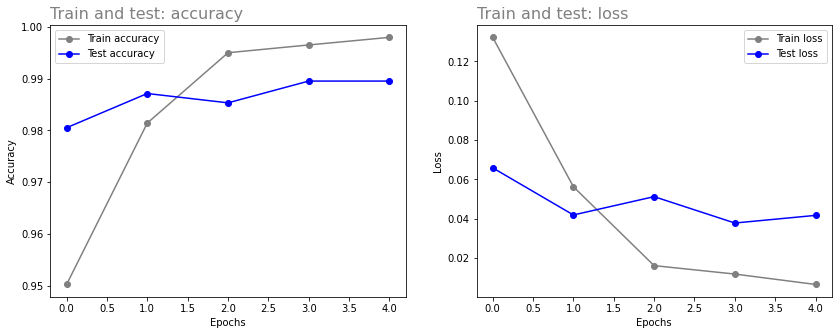

In [ ]:
# plotando a performance de treinamento
epochs = [i for i in range(5)]

fig, ax = plt.subplots(1, 2)
train_acc = history.history["accuracy"]
train_loss = history.history["loss"]
val_acc = history.history["val_accuracy"]
val_loss = history.history["val_loss"]
fig.set_size_inches(14, 5)

ax[0].plot(epochs, train_acc, "go-", label = "Train accuracy", color='gray')
ax[0].plot(epochs, val_acc, "ro-", label = "Test accuracy", color='blue')
ax[0].set_title("Train and test: accuracy", color = "gray", fontsize= 16, loc="left")
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs, train_loss, "go-", label = "Train loss", color='gray')
ax[1].plot(epochs, val_loss, "ro-", label = "Test loss", color='blue')
ax[1].set_title("Train and test: loss", color = "gray", fontsize= 16, loc="left")
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")

plt.show()

In [ ]:
# gerando a previsão
pred = (model.predict(X_test) > 0.5).astype("int32")

# visualizando o desempenho da previsão
print(classification_report(y_test, pred, target_names = ['Fake','True']))

348/348 [==============================] - 5s 13ms/step
              precision    recall  f1-score   support

        Fake       0.99      0.99      0.99      5872
        True       0.99      0.99      0.99      5248

    accuracy                           0.99     11120
   macro avg       0.99      0.99      0.99     11120
weighted avg       0.99      0.99      0.99     11120



Sobre as demais métricas também obtivemos bons resultados de desempenho.

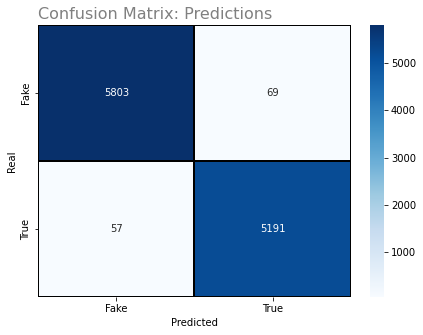

In [ ]:
# plotando a performance da previsão
cm = confusion_matrix(y_test, pred)
cm = pd.DataFrame(cm , index = ['Fake','Original'] , columns = ['Fake','Original'])

plt.figure(figsize = (7,5))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['Fake','True'] , yticklabels = ['Fake','True'])
plt.title("Confusion Matrix: Predictions", color = "gray", fontsize= 16, loc="left")
plt.xlabel("Predicted")
plt.ylabel("Real");

Na matrix conseguimos visualizar como o modelo performou sob diversos cenários de forma quantitativa, demonstrando novamente o bom desempenho.

# Finalizando o modelo

**Análise dos dados gerado pelo modelo**

Aqui podemos visualizar tanto os dados gerados pelo modelo de classificação desenvolvido neste estudo como os dados reais de detecção de fake news dos nossos dados originais. Neste *dataframe* conseguimos fazer uma comparação visual entre estes dados:

In [ ]:
# gerando novo dataframe de output comparativo
output = pd.DataFrame({'predict_target': pred.flatten(), 'real_target': y_test})
output

,predict_target,real_target
15714,0,0
5919,1,1
18563,0,0
9571,1,1
17245,1,1
...,...,...
3742,1,1
6705,0,0
17695,1,1
16988,1,1


**Salvando o Modelo**

Agora que terminamos nosso trabalho com o modelo, é hora de se preocupar em como mantê-lo utilizável e pronto para fazer novas previsões em novos dados.

Com a função `joblib.dump` conseguimos salvar o nosso modelo treinado, pronto para uso. Dentro dele também está contido todo o pipeline de pré-processamento que foi utilizado. Basta passar o conjunto de dados para fazer as previsões.

In [ ]:
# salvando o modelo como um pickle em um arquivo
joblib.dump(model, 'classifier_fake.pkl')

['classifier_fake.pkl']

**Carregando um Modelo**

Com o modelo carregado, é fácil fazer novas previsões com ele, assim como fizemos ao finalizar nosso modelo.

Para isso, vamos utilizar o método `load_model`, passando como parâmetro o nome do arquivo do modelo.

In [ ]:
# carregando o modelo do arquivo
model_from_joblib = joblib.load('classifier_fake.pkl')
 
# usando o modelo carregado para fazer predições
model_from_joblib.predict(X_test)

348/348 [==============================] - 5s 13ms/step


array([[1.5145255e-03],
       [9.9999642e-01],
       [2.1534283e-03],
       ...,
       [9.9985826e-01],
       [9.9999738e-01],
       [6.0900132e-04]], dtype=float32)

# Conclusão do estudo

O modelo de *rede neural* desenvolvido nos detecta a existência de uma fake news através de um *target* do tipo binário, ele faz uma previsão se há ou não o risco de ser uma fake news. Neste modelo desenvolvido obtivemos um desempenho em um patamar satisfatório, atendendo os objetivos propostos inicialmente neste estudo.

Além disso, a *exploratoty data analysis (EDA)* proporcionou insights relevantes que contribuiram para o entendimento das características de nossos dados.